In [190]:
import pandas as pd

# Load the CSV files into DataFrames
pc_legend_stats = pd.read_csv(r'C:\Users\altaa\Documents\GitHub\Apex-Legends-Research\Data_Retrieval\CSV_files\Stats Per Legend\Data Imputation\Imputated Datasets\Final Datasets\PC_Legend_Stats_Final_Dataset.csv')
ps_legend_stats = pd.read_csv(r'C:\Users\altaa\Documents\GitHub\Apex-Legends-Research\Data_Retrieval\CSV_files\Stats Per Legend\Data Imputation\Imputated Datasets\Final Datasets\PS4_Legend_Stats_Final_Dataset.csv')
xbox_legend_stats = pd.read_csv(r'C:\Users\altaa\Documents\GitHub\Apex-Legends-Research\Data_Retrieval\CSV_files\Stats Per Legend\Data Imputation\Imputated Datasets\Final Datasets\Xbox_Legend_Stats_Final_Dataset.csv')

# Add 'platform' column to each DataFrame
pc_legend_stats['platform'] = 'PC'
ps_legend_stats['platform'] = 'PlayStation'
xbox_legend_stats['platform'] = 'Xbox'


In [191]:
# Combine all DataFrames into one
legend_stats = pd.concat([pc_legend_stats, ps_legend_stats, xbox_legend_stats], ignore_index=True)
#drop legend column
# legend_stats = legend_stats.drop(columns='legend')

legend_stats.head()

,player_name,legend,legend_category,BR Kills,BR Damage,BR Wins,platform
0,#1 Valkuraee_Twitch TV,Valkyrie,Skirmisher,72440.0,18966877.0,4293.0,PC
1,#1 Valkuraee_Twitch TV,Revenant,Skirmisher,11710.0,3072054.0,675.0,PC
2,( `),Wraith,Skirmisher,20463.0,182528.0,566.0,PC
3,( `),Pathfinder,Skirmisher,12285.0,212733.0,343.0,PC
4,( `),Gibraltar,Support,6584.0,479149.0,217.0,PC


In [192]:
legend_stats.shape[0]

35821

In [193]:

(legend_stats == 0).sum()


player_name           0
legend                0
legend_category       0
BR Kills             36
BR Damage             0
BR Wins            2298
platform              0
dtype: int64

In [194]:
# Calculate mean values for each Legend category
category_means = legend_stats.groupby('legend_category')[['BR Kills','BR Damage','BR Wins']].mean().reset_index()

# drip the unknow category
# category_means = category_means[category_means.legend_category != 'Unknown']

print("Average Stats per Legend Category:")
display(category_means)

# Calculate mean values grouped by platform and legend category
platform_category_means = legend_stats.groupby(['platform', 'legend_category'])[['BR Kills','BR Damage','BR Wins']].mean().reset_index()

# platform_category_means = platform_category_means[platform_category_means.legend_category != 'Unknown']

print("Average Stats by Platform and Legend Category:")
display(platform_category_means)

# Calculate mean values for each platform
platform_means = legend_stats.groupby('platform')[['BR Kills','BR Damage','BR Wins']].mean().reset_index()

print("Average Stats per Platform:")
display(platform_means)



Average Stats per Legend Category:


,legend_category,BR Kills,BR Damage,BR Wins
0,Assault,4476.057877,1.246435e+06,271.947163
1,Controller,3620.506955,1.025664e+06,215.346655
2,Recon,2739.875025,7.803137e+05,172.812538
3,Skirmisher,11668.754474,3.071015e+06,665.679710
4,Support,6468.972434,1.777738e+06,416.632241


Average Stats by Platform and Legend Category:


,platform,legend_category,BR Kills,BR Damage,BR Wins
0,PC,Assault,4362.647238,1.224632e+06,253.321845
1,PC,Controller,3966.314121,1.114734e+06,234.312680
2,PC,Recon,3043.979180,8.614933e+05,185.715680
3,PC,Skirmisher,13328.028670,3.525315e+06,742.818689
4,PC,Support,6333.325852,1.715190e+06,386.306318
5,PlayStation,Assault,5163.784342,1.416407e+06,314.334294
6,PlayStation,Controller,3483.896686,9.794808e+05,202.528915
7,PlayStation,Recon,2900.875443,8.138640e+05,189.244982
8,PlayStation,Skirmisher,12223.143998,3.158662e+06,694.080100
9,PlayStation,Support,7207.933608,1.885821e+06,475.496249


Average Stats per Platform:


,platform,BR Kills,BR Damage,BR Wins
0,PC,7608.708247,2.049876e+06,437.008942
1,PlayStation,7587.556985,1.998214e+06,452.628731
2,Xbox,5964.395818,1.658259e+06,366.224994


C:\Users\altaa\AppData\Local\Temp\ipykernel_40828\3321732086.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='legend_category', y='BR Kills', data=category_means, ax=axes[0], palette='Blues_d')
C:\Users\altaa\AppData\Local\Temp\ipykernel_40828\3321732086.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='legend_category', y='BR Damage', data=category_means, ax=axes[1], palette='Greens_d')
C:\Users\altaa\AppData\Local\Temp\ipykernel_40828\3321732086.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='legend_category', y='BR Wi

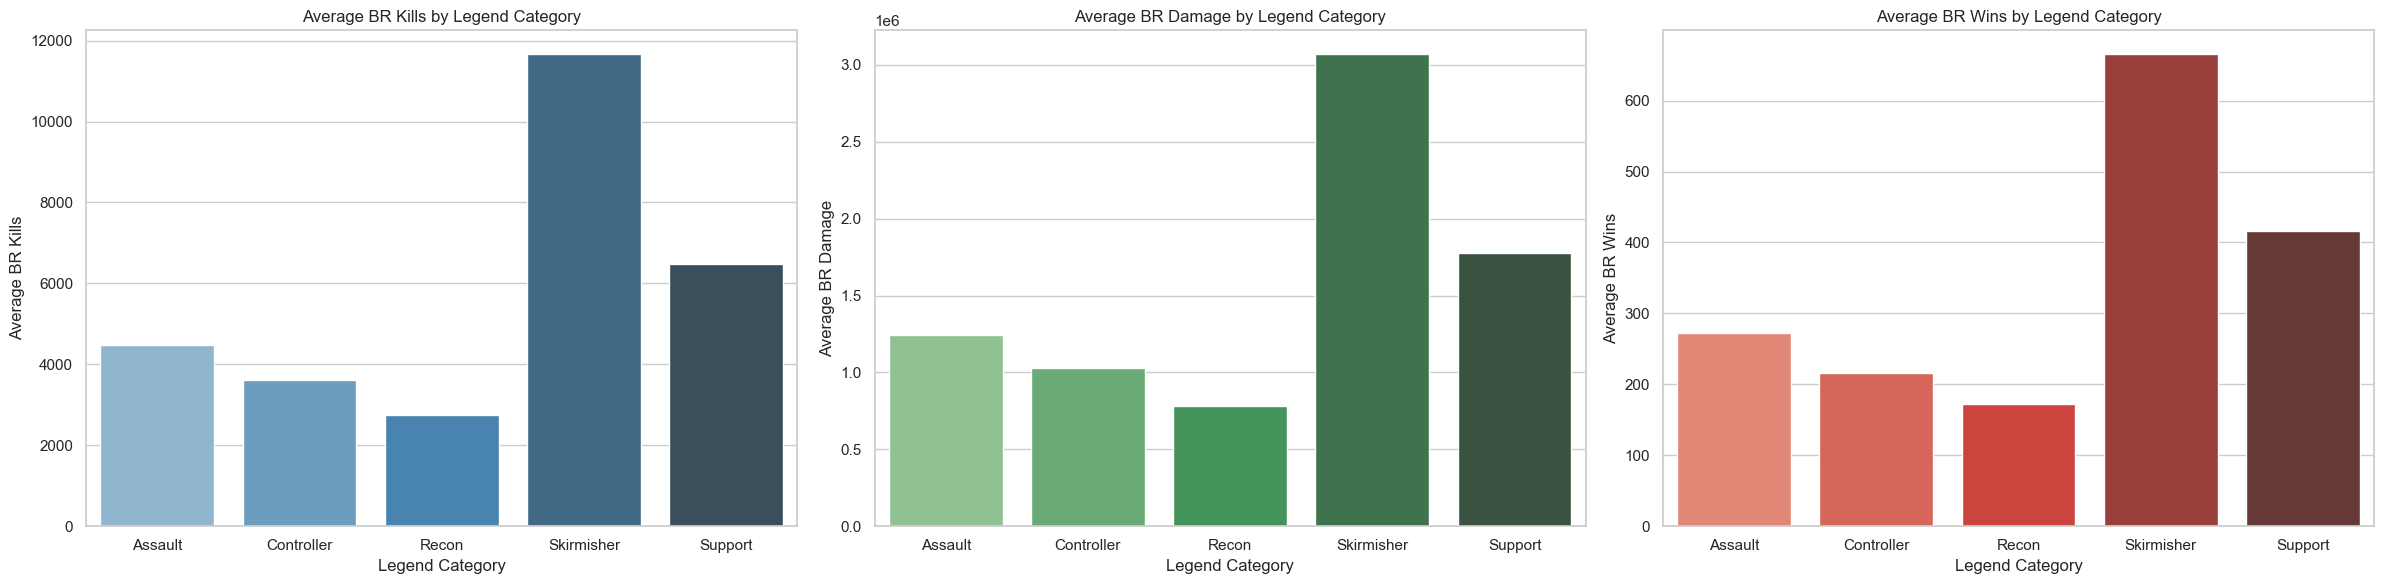

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style='whitegrid')

# Create subplots for BR Kills, BR Damage, and BR Wins
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Bar plot for BR Kills by Legend Category
sns.barplot(x='legend_category', y='BR Kills', data=category_means, ax=axes[0], palette='Blues_d')
axes[0].set_title('Average BR Kills by Legend Category')
axes[0].set_xlabel('Legend Category')
axes[0].set_ylabel('Average BR Kills')

# Bar plot for BR Damage by Legend Category
sns.barplot(x='legend_category', y='BR Damage', data=category_means, ax=axes[1], palette='Greens_d')
axes[1].set_title('Average BR Damage by Legend Category')
axes[1].set_xlabel('Legend Category')
axes[1].set_ylabel('Average BR Damage')

# Bar plot for BR Wins by Legend Category
sns.barplot(x='legend_category', y='BR Wins', data=category_means, ax=axes[2], palette='Reds_d')
axes[2].set_title('Average BR Wins by Legend Category')
axes[2].set_xlabel('Legend Category')
axes[2].set_ylabel('Average BR Wins')

# Adjust layout
plt.tight_layout()
plt.show()


C:\Users\altaa\AppData\Local\Temp\ipykernel_40828\4101862011.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='platform', y='BR Kills', data=platform_means, ax=axes[0], palette='Blues_d')
C:\Users\altaa\AppData\Local\Temp\ipykernel_40828\4101862011.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='platform', y='BR Damage', data=platform_means, ax=axes[1], palette='Greens_d')
C:\Users\altaa\AppData\Local\Temp\ipykernel_40828\4101862011.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='platform', y='BR Wins', data=platform_mea

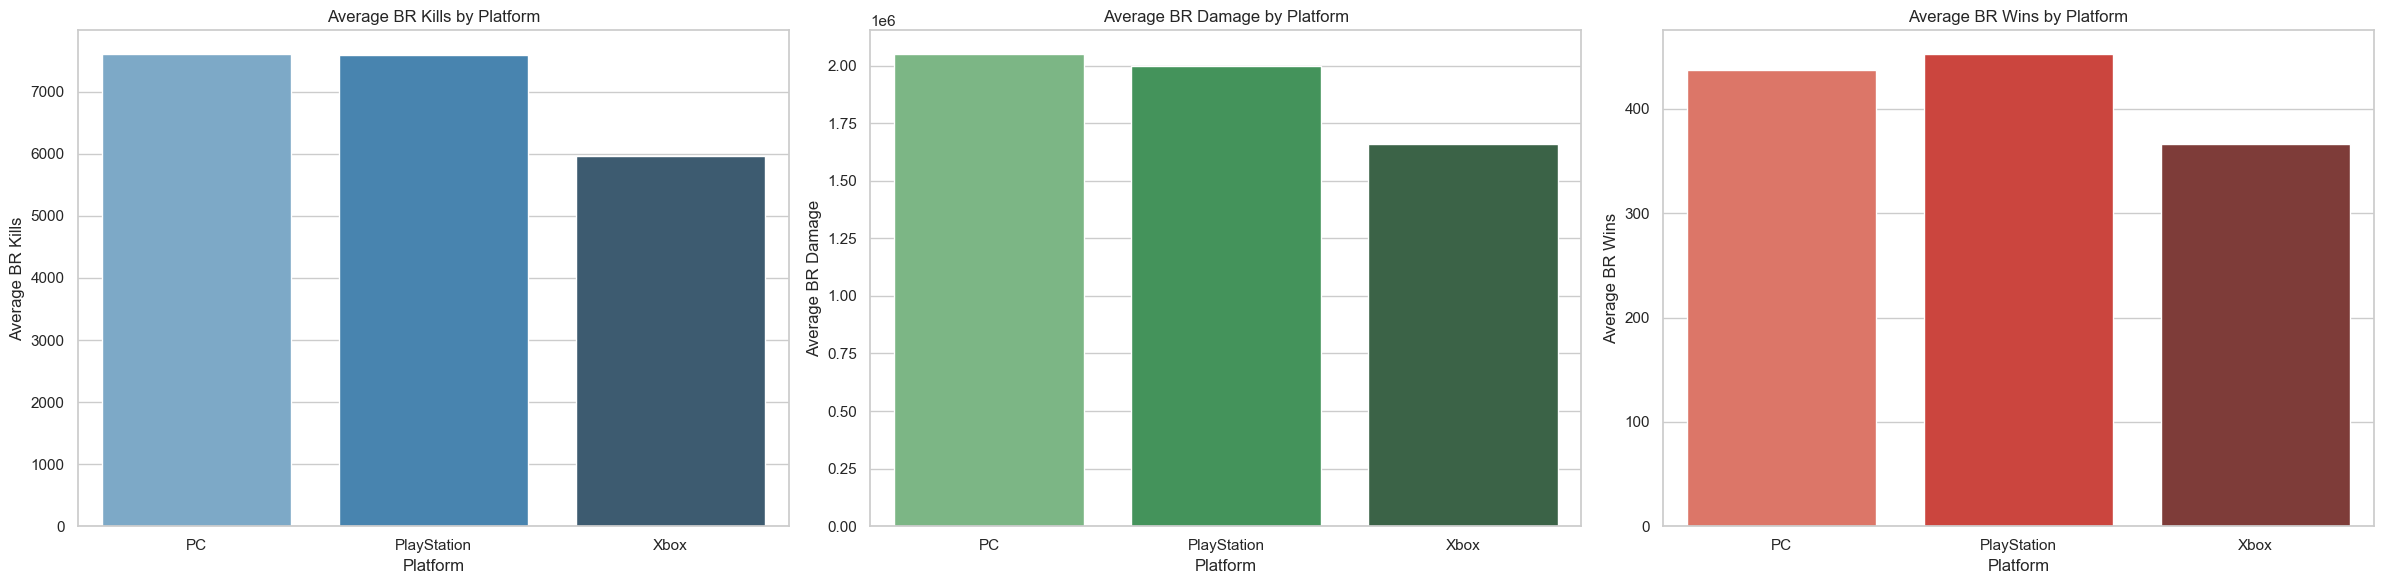

In [196]:
# Create subplots for BR Kills, BR Damage, and BR Wins
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Bar plot for BR Kills by Platform
sns.barplot(x='platform', y='BR Kills', data=platform_means, ax=axes[0], palette='Blues_d')
axes[0].set_title('Average BR Kills by Platform')
axes[0].set_xlabel('Platform')
axes[0].set_ylabel('Average BR Kills')

# Bar plot for BR Damage by Platform
sns.barplot(x='platform', y='BR Damage', data=platform_means, ax=axes[1], palette='Greens_d')
axes[1].set_title('Average BR Damage by Platform')
axes[1].set_xlabel('Platform')
axes[1].set_ylabel('Average BR Damage')

# Bar plot for BR Wins by Platform
sns.barplot(x='platform', y='BR Wins', data=platform_means, ax=axes[2], palette='Reds_d')
axes[2].set_title('Average BR Wins by Platform')
axes[2].set_xlabel('Platform')
axes[2].set_ylabel('Average BR Wins')

# Adjust layout
plt.tight_layout()
plt.show()


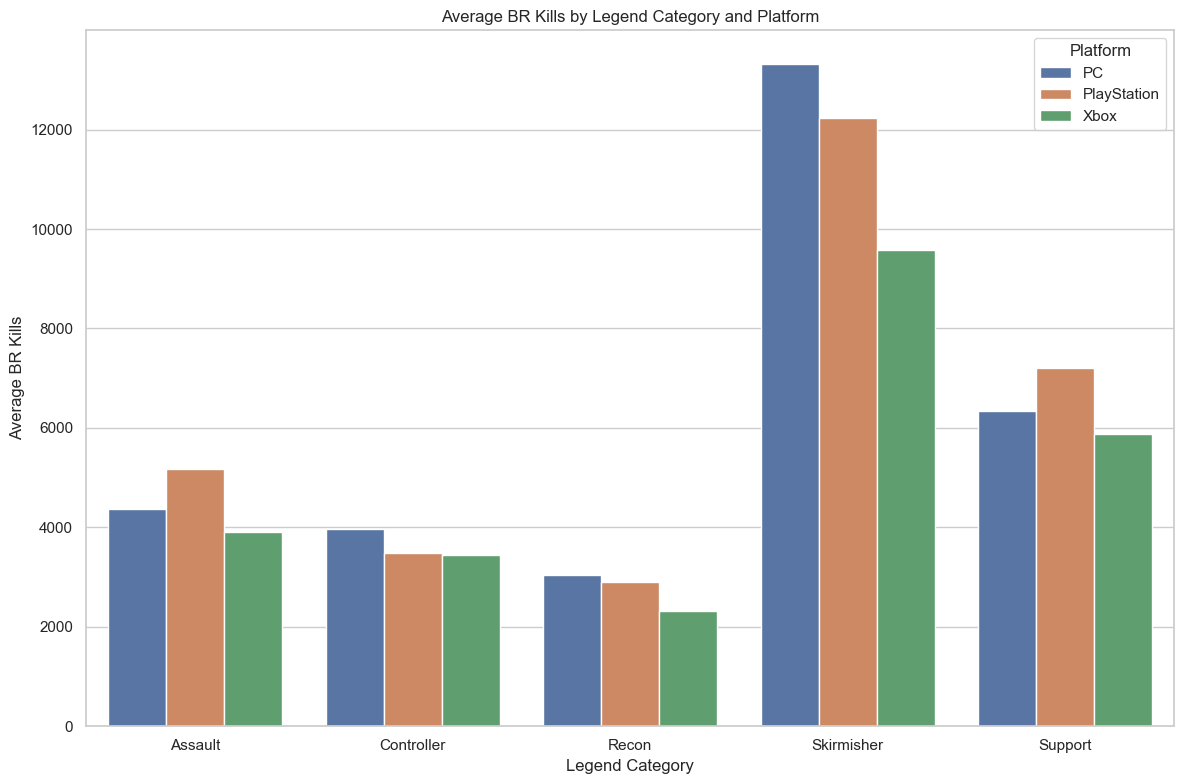

In [197]:
# Plotting Average BR Kills by Legend Category and Platform
plt.figure(figsize=(12, 8))
sns.barplot(x='legend_category', y='BR Kills', hue='platform', data=platform_category_means)
plt.title('Average BR Kills by Legend Category and Platform')
plt.xlabel('Legend Category')
plt.ylabel('Average BR Kills')
plt.legend(title='Platform')
plt.tight_layout()
plt.show()


In [198]:
legend_means = legend_stats.groupby('legend')[['BR Kills','BR Damage','BR Wins']].mean().reset_index()

# Sort Legends by average BR Wins in descending order for better visualization
legend_means = legend_means.sort_values(by='BR Kills', ascending=False)

# Display the results
print("Average Stats per Legend:")
display(legend_means)

Average Stats per Legend:


,legend,BR Kills,BR Damage,BR Wins
25,Wraith,21818.560160,5.824772e+06,1242.967914
18,Pathfinder,15113.792603,3.977483e+06,890.661985
12,Lifeline,12860.077963,3.543927e+06,838.473493
11,Horizon,12487.453725,3.128726e+06,689.448758
3,Bangalore,9545.827905,2.593632e+06,592.275158
17,Octane,8870.738575,2.370997e+06,502.330221
24,Wattson,6317.531040,1.727389e+06,371.285714
13,Loba,6115.636881,1.652689e+06,394.020489
22,Valkyrie,5687.519591,1.499684e+06,334.169790
15,Mirage,4504.092295,1.190307e+06,283.945425


C:\Users\altaa\AppData\Local\Temp\ipykernel_40828\1832394261.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='legend', y='BR Wins', data=legend_means, palette='viridis')


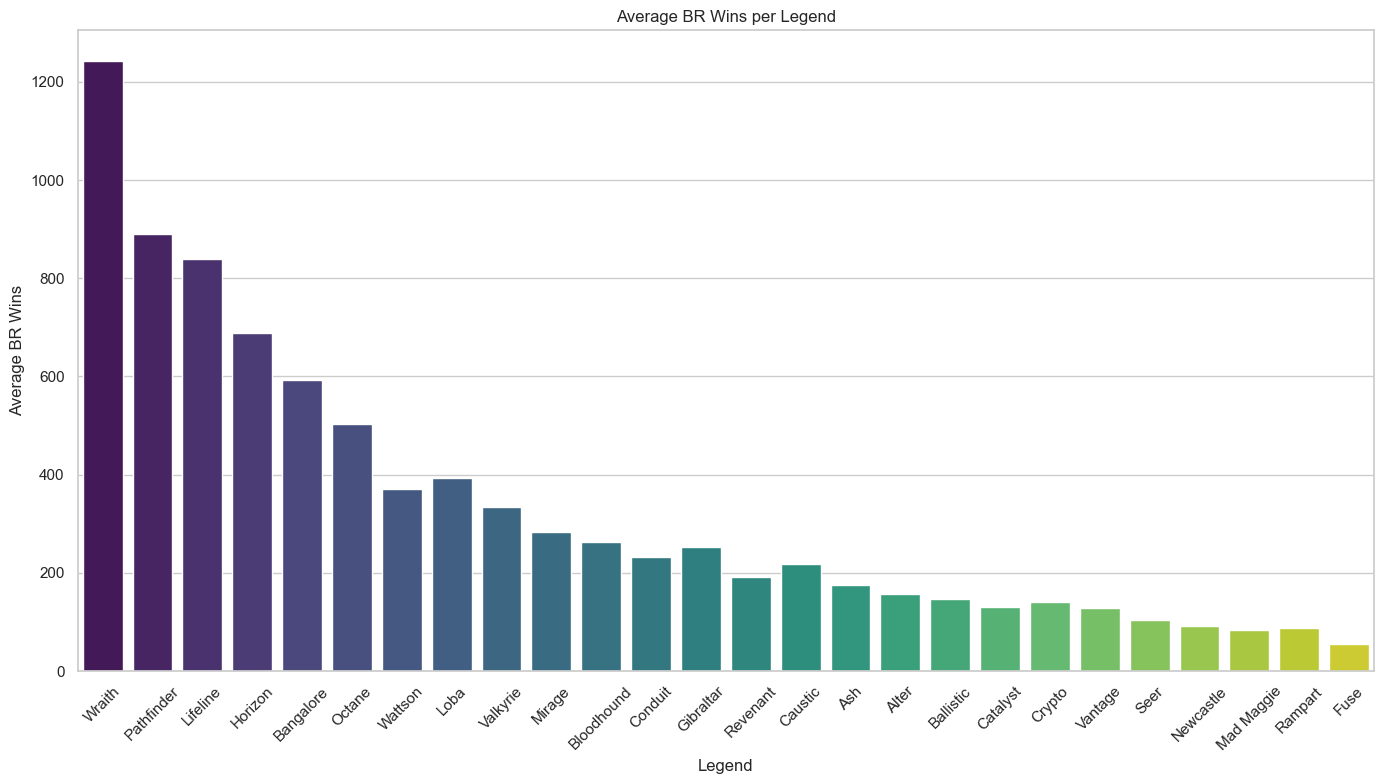

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style='whitegrid')

# Plot average BR Wins per Legend
plt.figure(figsize=(14, 8))
sns.barplot(x='legend', y='BR Wins', data=legend_means, palette='viridis')
plt.title('Average BR Wins per Legend')
plt.xlabel('Legend')
plt.ylabel('Average BR Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\altaa\AppData\Local\Temp\ipykernel_40828\3981948005.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='legend', y='BR Kills', data=legend_means_kills, palette='coolwarm')


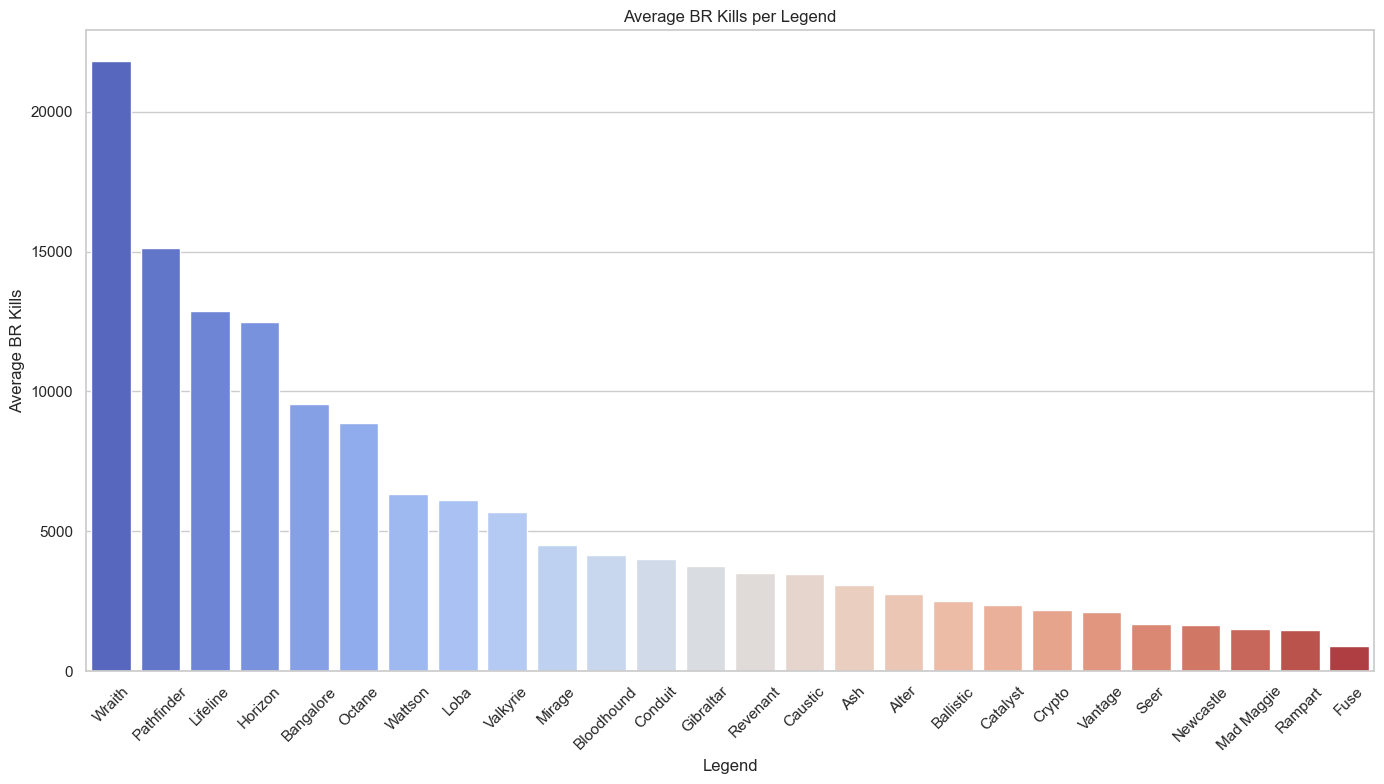

In [200]:
# Sort Legends by average BR Kills in descending order
legend_means_kills = legend_means.sort_values(by='BR Kills', ascending=False)

# Plot average BR Kills per Legend
plt.figure(figsize=(14, 8))
sns.barplot(x='legend', y='BR Kills', data=legend_means_kills, palette='coolwarm')
plt.title('Average BR Kills per Legend')
plt.xlabel('Legend')
plt.ylabel('Average BR Kills')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\altaa\AppData\Local\Temp\ipykernel_40828\2911850771.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='legend', y='BR Damage', data=legend_means_kills, palette='coolwarm')


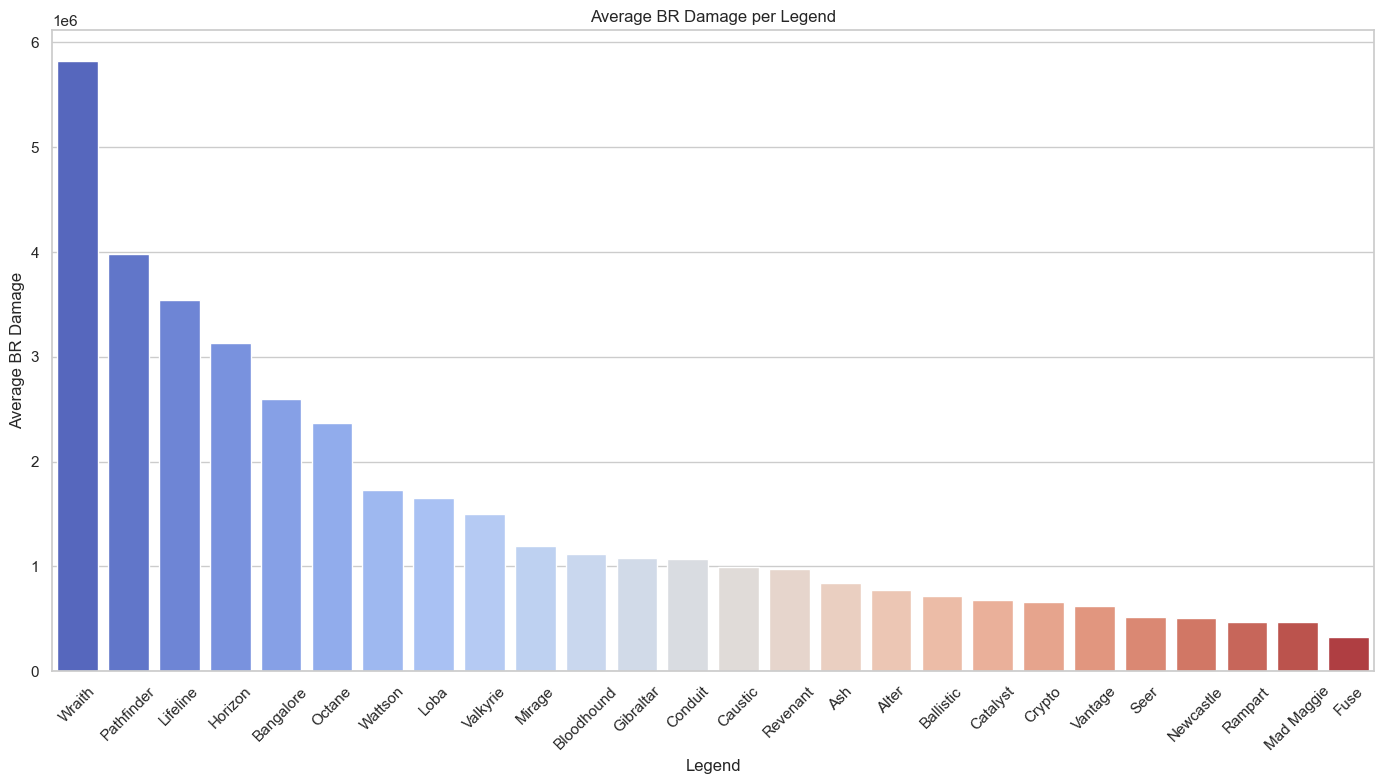

In [201]:
# Sort Legends by average BR Kills in descending order
legend_means_kills = legend_means.sort_values(by='BR Damage', ascending=False)

# Plot average BR Kills per Legend
plt.figure(figsize=(14, 8))
sns.barplot(x='legend', y='BR Damage', data=legend_means_kills, palette='coolwarm')
plt.title('Average BR Damage per Legend')
plt.xlabel('Legend')
plt.ylabel('Average BR Damage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [202]:
# Calculate the correlation between BR Kills and BR Wins
correlation_kills_wins = legend_stats['BR Kills'].corr(legend_stats['BR Wins'])

In [203]:
print(f"Correlation between BR Kills and BR Wins: {correlation_kills_wins}")


Correlation between BR Kills and BR Wins: 0.9485983309358882


Correlation Matrix:
           BR Kills  BR Damage   BR Wins
BR Kills   1.000000   0.931822  0.948598
BR Damage  0.931822   1.000000  0.900283
BR Wins    0.948598   0.900283  1.000000


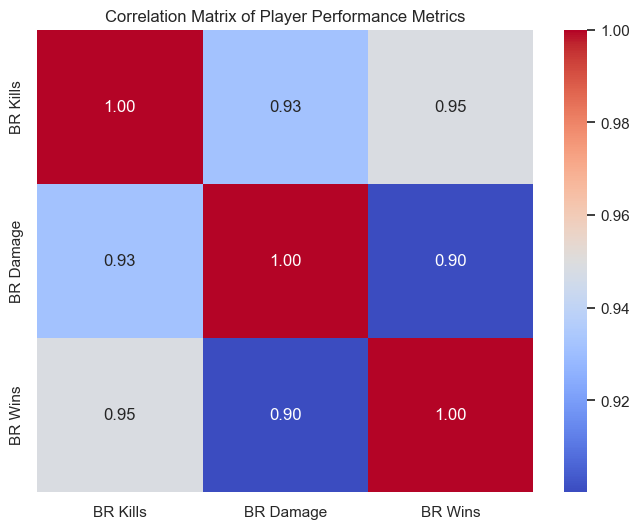

In [204]:
# Select the numerical columns relevant for correlation analysis (kills, damage, wins, etc.)
columns_for_analysis = ['BR Kills', 'BR Damage', 'BR Wins']  # Adjust as needed for other variables you may have

# Calculate the correlation matrix
correlation_matrix = legend_stats[columns_for_analysis].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix of Player Performance Metrics')
plt.show()

# PAS and CLustering

In [205]:
legend_stats.isnull().sum()

player_name        0
legend             0
legend_category    0
BR Kills           0
BR Damage          0
BR Wins            0
platform           0
dtype: int64

In [206]:
legend_stats.head()

,player_name,legend,legend_category,BR Kills,BR Damage,BR Wins,platform
0,#1 Valkuraee_Twitch TV,Valkyrie,Skirmisher,72440.0,18966877.0,4293.0,PC
1,#1 Valkuraee_Twitch TV,Revenant,Skirmisher,11710.0,3072054.0,675.0,PC
2,( `),Wraith,Skirmisher,20463.0,182528.0,566.0,PC
3,( `),Pathfinder,Skirmisher,12285.0,212733.0,343.0,PC
4,( `),Gibraltar,Support,6584.0,479149.0,217.0,PC


In [207]:
legend_stats.head()

# # Calculate the average PAS for each Legend category
# legend_category_pases = legend_stats.groupby('legend_category')['PAS'].mean().reset_index()

# # Sort the categories by average PAS
# legend_category_pases = legend_category_pases.sort_values(by='PAS', ascending=False)

# # Display the results
# print("Average PAS per Legend Category:")
# display(legend_category_pases)


,player_name,legend,legend_category,BR Kills,BR Damage,BR Wins,platform
0,#1 Valkuraee_Twitch TV,Valkyrie,Skirmisher,72440.0,18966877.0,4293.0,PC
1,#1 Valkuraee_Twitch TV,Revenant,Skirmisher,11710.0,3072054.0,675.0,PC
2,( `),Wraith,Skirmisher,20463.0,182528.0,566.0,PC
3,( `),Pathfinder,Skirmisher,12285.0,212733.0,343.0,PC
4,( `),Gibraltar,Support,6584.0,479149.0,217.0,PC


Legend Category Summary:
  legend_category      BR Kills     BR Damage     BR Wins           PAS
0         Assault   4362.647238  1.224632e+06  253.321845  30067.894142
1      Controller   3966.314121  1.114734e+06  234.312680  27631.645593
2           Recon   3043.979180  8.614933e+05  185.715680  28304.608169
3      Skirmisher  13328.028670  3.525315e+06  742.818689  13397.892475
4         Support   6333.325852  1.715190e+06  386.306318  19720.651836


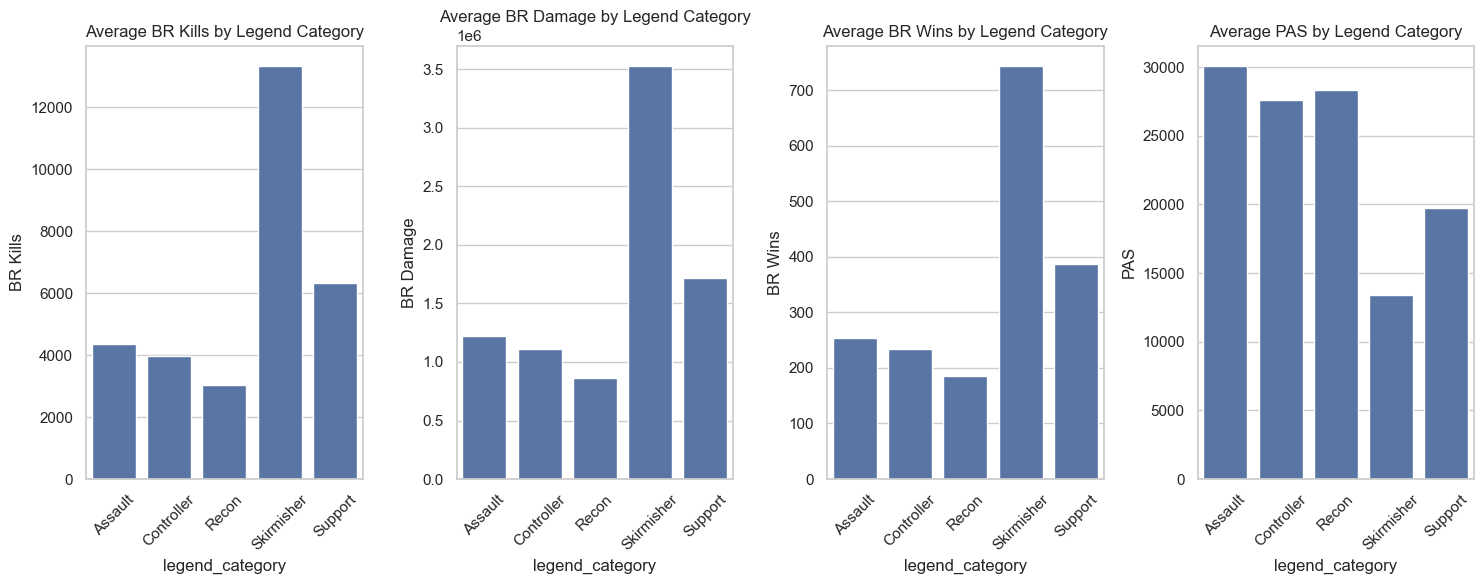

In [208]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the final dataset (adjust the path to your dataset)
pc_legend_stats = pc_legend_stats

# Calculate PAS if not already present
if 'PAS' not in pc_legend_stats.columns:
    pc_legend_stats['PAS'] = (pc_legend_stats['BR Kills'] / (pc_legend_stats['BR Wins'] + 1)) + (pc_legend_stats['BR Damage'] / (pc_legend_stats['BR Wins'] + 1))

# Group by legend_category to calculate average PAS, kills, damage, and wins
legend_category_summary = pc_legend_stats.groupby('legend_category')[['BR Kills', 'BR Damage', 'BR Wins', 'PAS']].mean().reset_index()

# Display the summary
print("Legend Category Summary:")
print(legend_category_summary)

# Visualize the average PAS, kills, damage, and wins for each legend category
plt.figure(figsize=(15, 6))

# Subplot for BR Kills
plt.subplot(1, 4, 1)
sns.barplot(data=legend_category_summary, x='legend_category', y='BR Kills')
plt.title('Average BR Kills by Legend Category')
plt.xticks(rotation=45)
plt.tight_layout()

# Subplot for BR Damage
plt.subplot(1, 4, 2)
sns.barplot(data=legend_category_summary, x='legend_category', y='BR Damage')
plt.title('Average BR Damage by Legend Category')
plt.xticks(rotation=45)
plt.tight_layout()

# Subplot for BR Wins
plt.subplot(1, 4, 3)
sns.barplot(data=legend_category_summary, x='legend_category', y='BR Wins')
plt.title('Average BR Wins by Legend Category')
plt.xticks(rotation=45)
plt.tight_layout()

# Subplot for PAS
plt.subplot(1, 4, 4)
sns.barplot(data=legend_category_summary, x='legend_category', y='PAS')
plt.title('Average PAS by Legend Category')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plots
plt.show()


Legend Category Summary with Modified PAS:
  legend_category      BR Kills     BR Damage     BR Wins           PAS  \
0         Assault   4362.647238  1.224632e+06  253.321845  30067.894142   
1      Controller   3966.314121  1.114734e+06  234.312680  27631.645593   
2           Recon   3043.979180  8.614933e+05  185.715680  28304.608169   
3      Skirmisher  13328.028670  3.525315e+06  742.818689  13397.892475   
4         Support   6333.325852  1.715190e+06  386.306318  19720.651836   

    PAS_Modified  
0   82290.818093  
1   74231.314969  
2   73547.539828  
3  115175.426915  
4   81915.173259  


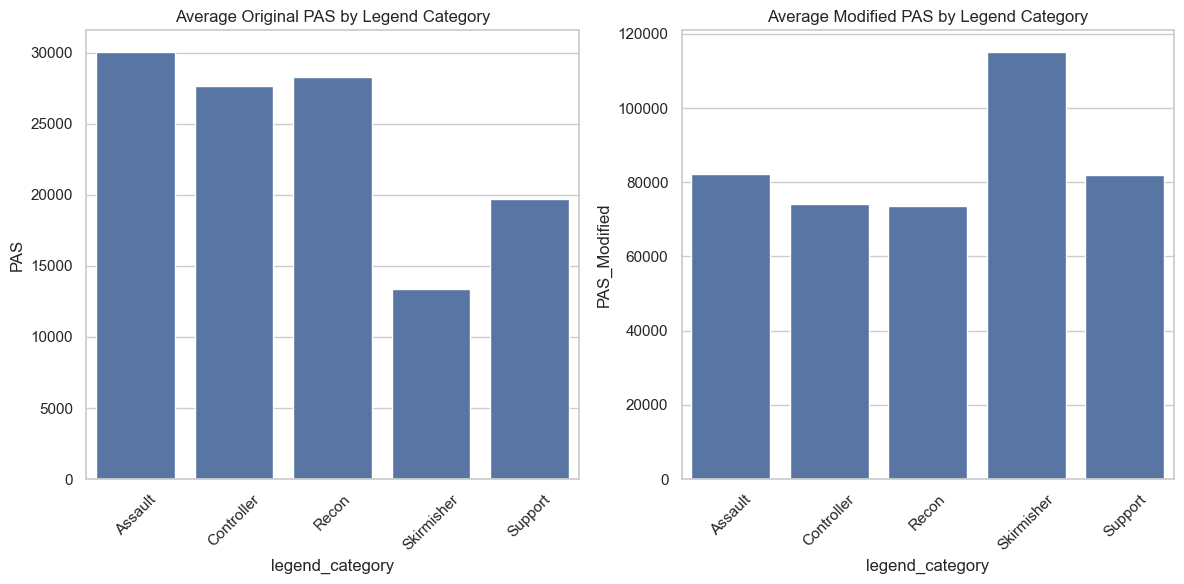

In [209]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pc_legend_stats = pc_legend_stats

# Calculate PAS
pc_legend_stats['PAS'] = (pc_legend_stats['BR Kills'] / (pc_legend_stats['BR Wins'] + 1)) + (pc_legend_stats['BR Damage'] / (pc_legend_stats['BR Wins'] + 1))

# Calculate a modified PAS using the adjusted formula
pc_legend_stats['PAS_Modified'] = (pc_legend_stats['BR Kills'] / np.sqrt(pc_legend_stats['BR Wins'] + 1)) + (pc_legend_stats['BR Damage'] / np.sqrt(pc_legend_stats['BR Wins'] + 1))

# Group by legend_category to calculate average PAS and PAS_Modified
legend_category_summary_modified = pc_legend_stats.groupby('legend_category')[['BR Kills', 'BR Damage', 'BR Wins', 'PAS', 'PAS_Modified']].mean().reset_index()

# Display the summary
print("Legend Category Summary with Modified PAS:")
print(legend_category_summary_modified)

# Visualize the comparison between PAS and PAS_Modified for each legend category
plt.figure(figsize=(12, 6))

# Plot for original PAS
plt.subplot(1, 2, 1)
sns.barplot(data=legend_category_summary_modified, x='legend_category', y='PAS')
plt.title('Average Original PAS by Legend Category')
plt.xticks(rotation=45)
plt.tight_layout()

# Plot for modified PAS
plt.subplot(1, 2, 2)
sns.barplot(data=legend_category_summary_modified, x='legend_category', y='PAS_Modified')
plt.title('Average Modified PAS by Legend Category')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plots
plt.show()


# Clustering

## PC Clustering

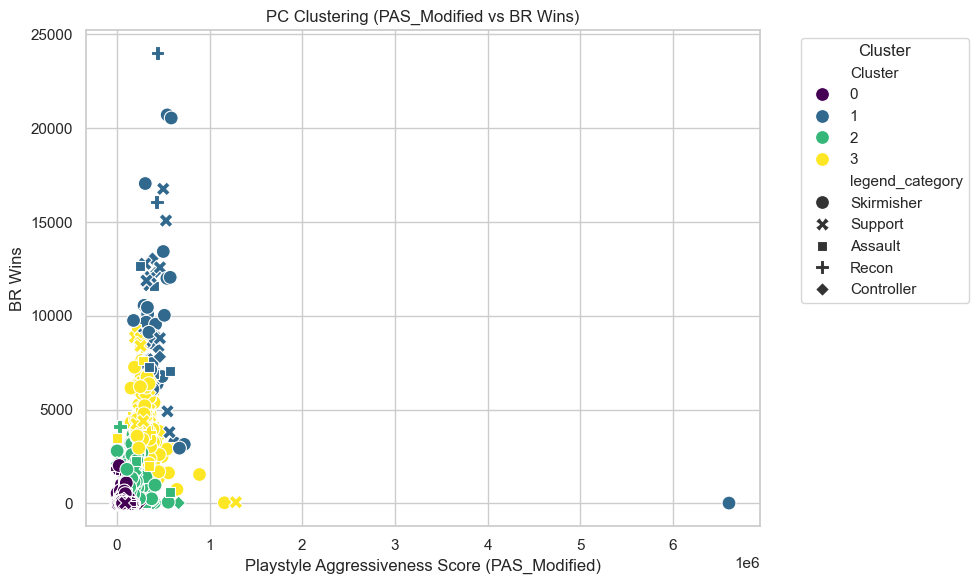

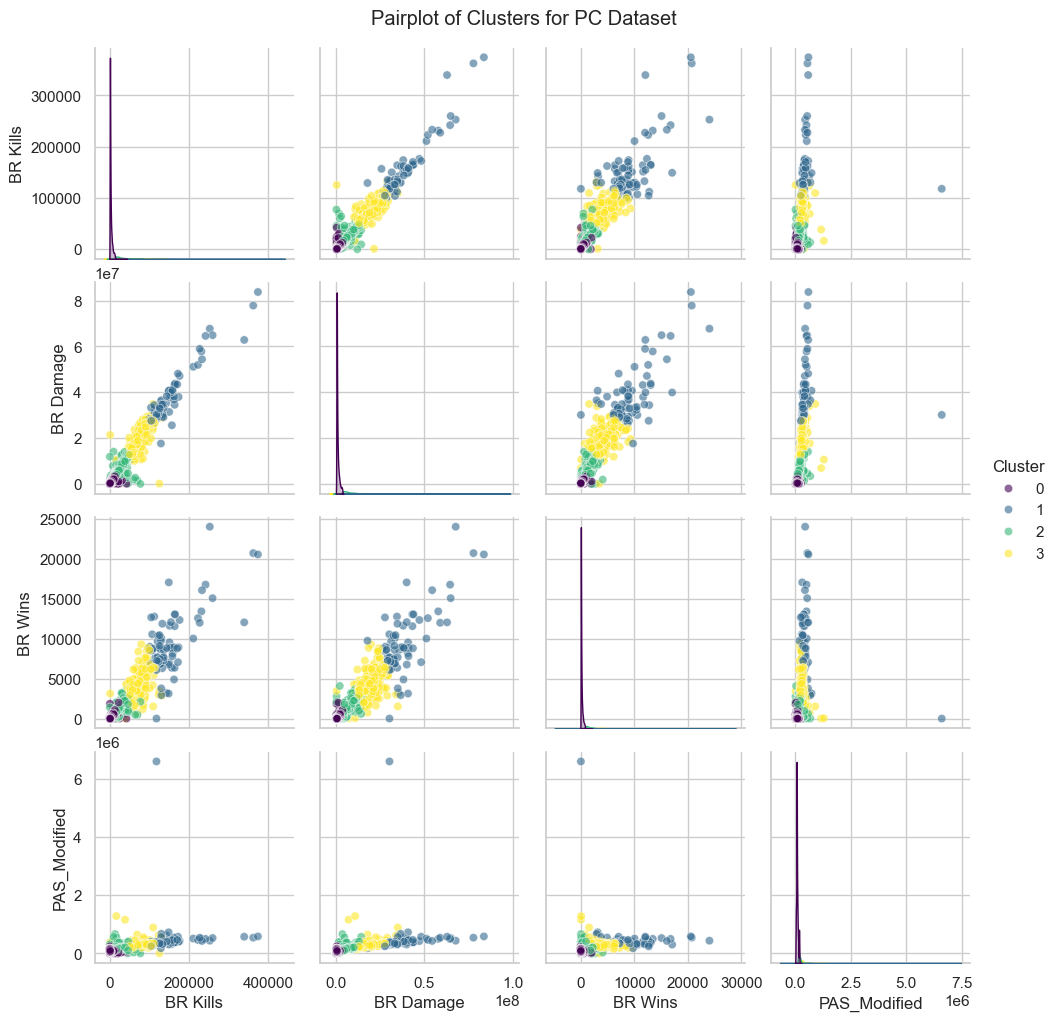


Cluster centroids (unscaled values):
        BR Kills     BR Damage      BR Wins   PAS_Modified
0    2176.944133  6.462715e+05   120.602819   70847.661592
1  152746.012500  3.787991e+07  9271.237500  480257.065963
2   24626.657505  6.519291e+06  1393.832981  178515.682601
3   69814.491184  1.829044e+07  4066.209068  298625.989872


In [210]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Calculate PAS_Modified if not already present
pc_legend_stats['PAS_Modified'] = (pc_legend_stats['BR Kills'] / (pc_legend_stats['BR Wins'] + 1) ** 0.5) + (pc_legend_stats['BR Damage'] / (pc_legend_stats['BR Wins'] + 1) ** 0.5)

# Prepare features for clustering
features = ['BR Kills', 'BR Damage', 'BR Wins', 'PAS_Modified']
X = pc_legend_stats[features]

# Standardize the features before clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering with 4 clusters (you can adjust the number)
kmeans = KMeans(n_clusters=4, random_state=42)
pc_legend_stats['Cluster'] = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the dataframe
pc_legend_stats['Cluster'] = kmeans.labels_

# Visualize the clusters using scatter plots for PAS_Modified vs BR Wins
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pc_legend_stats, x='PAS_Modified', y='BR Wins', hue='Cluster', style='legend_category', palette='viridis', s=100)
plt.title('PC Clustering (PAS_Modified vs BR Wins)')
plt.xlabel('Playstyle Aggressiveness Score (PAS_Modified)')
plt.ylabel('BR Wins')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Visualize clusters with pairplot to see relationships between features
sns.pairplot(pc_legend_stats, hue='Cluster', vars=features, palette='viridis', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Clusters for PC Dataset', y=1.02)
plt.show()

# Display the centroids of each cluster for better understanding
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
print("\nCluster centroids (unscaled values):")
print(centroids)


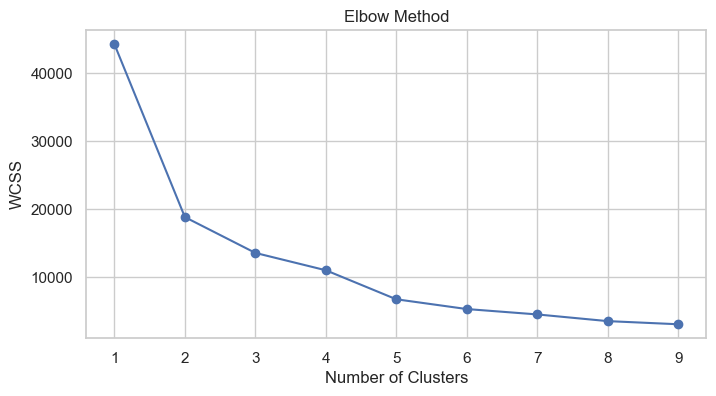

In [211]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate the within-cluster sum of squares (WCSS) for different numbers of clusters
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the WCSS to find the elbow point
plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


## Removing Outlier

C:\Users\altaa\AppData\Local\Temp\ipykernel_40828\3901222170.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outlier['Cluster'] = kmeans_filtered.fit_predict(X_filtered_scaled)


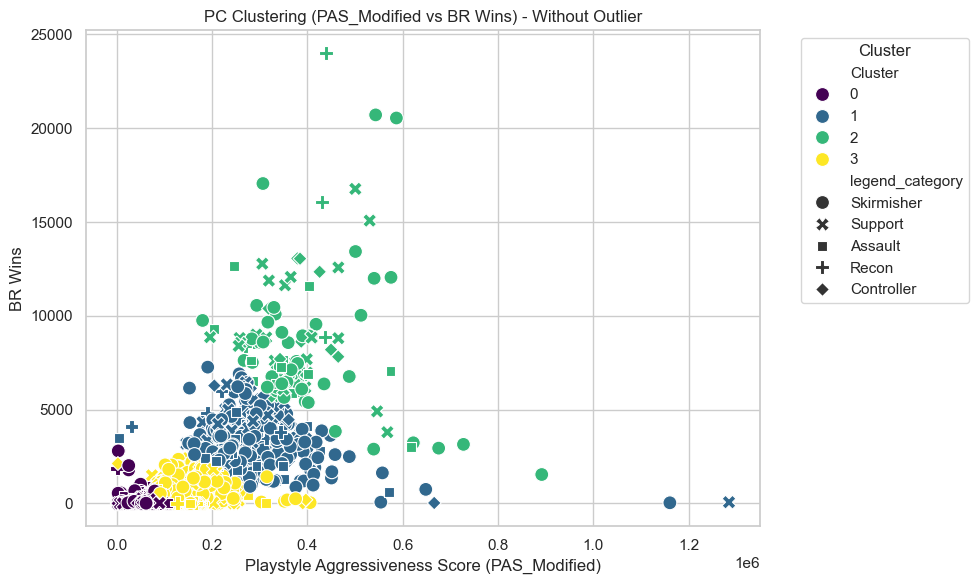


Cluster centroids without the outlier:
        BR Kills     BR Damage      BR Wins   PAS_Modified
0    1738.277285  5.167931e+05    96.039255   56776.182950
1   55102.224348  1.452189e+07  3158.316522  267831.054634
2  133706.216000  3.370446e+07  8223.432000  383762.222220
3    9201.401940  2.516684e+06   517.050612  146208.412575


In [212]:
# Define a threshold for PAS_Modified to identify outliers (e.g., PAS_Modified > 2e6)
threshold = 2e6

# Filter out the outlier
df_no_outlier = pc_legend_stats[pc_legend_stats['PAS_Modified'] < threshold]

# Re-run the clustering on the filtered dataset
X_filtered = df_no_outlier[['BR Kills', 'BR Damage', 'BR Wins', 'PAS_Modified']]
X_filtered_scaled = scaler.fit_transform(X_filtered)

# Perform K-means clustering with the same number of clusters
kmeans_filtered = KMeans(n_clusters=4, random_state=42)
df_no_outlier['Cluster'] = kmeans_filtered.fit_predict(X_filtered_scaled)

# Visualize the clusters without the outlier
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outlier, x='PAS_Modified', y='BR Wins', hue='Cluster', style='legend_category', palette='viridis', s=100)
plt.title('PC Clustering (PAS_Modified vs BR Wins) - Without Outlier')
plt.xlabel('Playstyle Aggressiveness Score (PAS_Modified)')
plt.ylabel('BR Wins')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Compare centroids again without the outlier
pc_centroids_no_outlier = pd.DataFrame(scaler.inverse_transform(kmeans_filtered.cluster_centers_), columns=X_filtered.columns)
print("\nCluster centroids without the outlier:")
print(pc_centroids_no_outlier)


## Xbox and PS Clustering


Cluster centroids for PS4:
        BR Kills     BR Damage      BR Wins   PAS_Modified
0    1843.769223  5.484899e+05   110.234091   52764.932515
1   68014.611336  1.753711e+07  4002.232794  295235.145622
2  134571.355140  3.298930e+07  8682.485981  364183.843491
3   21910.491681  5.589584e+06  1269.257903  163780.605625


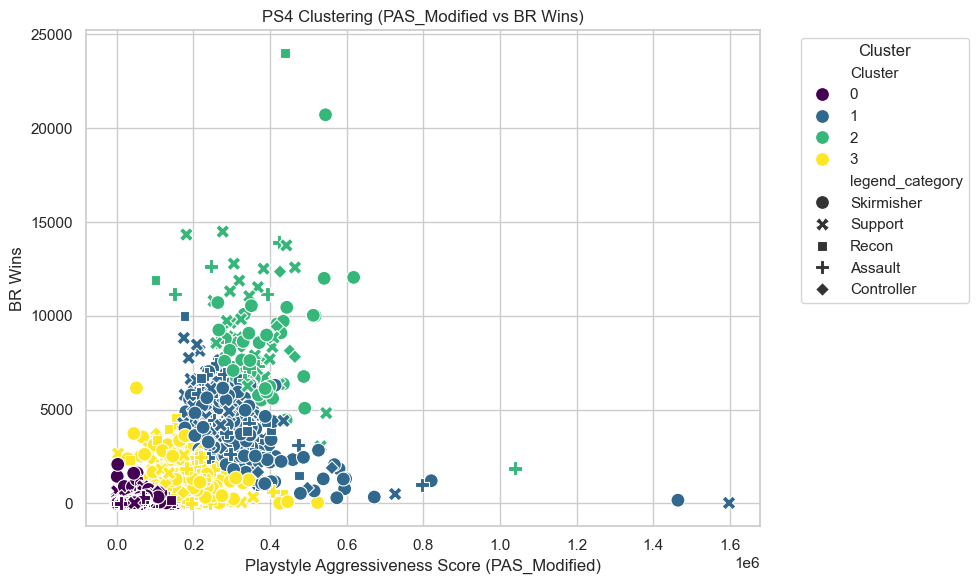


Cluster centroids for Xbox:
       BR Kills     BR Damage      BR Wins  PAS_Modified
0   2414.028670  7.131686e+05   142.824086  6.768794e+04
1  89341.565657  2.327973e+07  5894.368687  3.494040e+05
2  32577.081172  8.557429e+06  1977.950395  2.001318e+05
3  14532.000000  2.815055e+08   847.000000  9.667438e+06


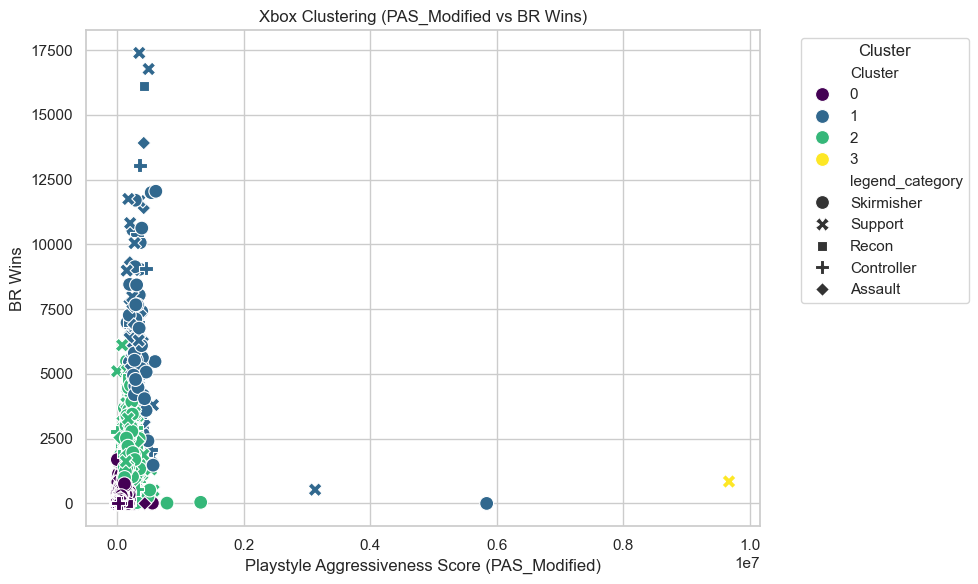

In [213]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

ps_legend_stats['PAS_Modified'] = (ps_legend_stats['BR Kills'] / (ps_legend_stats['BR Wins'] + 1) ** 0.5) + (ps_legend_stats['BR Damage'] / (ps_legend_stats['BR Wins'] + 1) ** 0.5)
xbox_legend_stats['PAS_Modified'] = (xbox_legend_stats['BR Kills'] / (xbox_legend_stats['BR Wins'] + 1) ** 0.5) + (xbox_legend_stats['BR Damage'] / (xbox_legend_stats['BR Wins'] + 1) ** 0.5)

# Function to perform clustering for a given dataset
def perform_clustering(df, platform_name):
    # Prepare data for clustering
    X = df[['BR Kills', 'BR Damage', 'BR Wins', 'PAS_Modified']]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Perform K-means clustering with 4 clusters
    kmeans = KMeans(n_clusters=4, random_state=42)
    df['Cluster'] = kmeans.fit_predict(X_scaled)
    
    # Extract and display the centroids (unscaled)
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns)
    print(f"\nCluster centroids for {platform_name}:")
    print(centroids)
    
    # Visualize the clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='PAS_Modified', y='BR Wins', hue='Cluster', style='legend_category', palette='viridis', s=100)
    plt.title(f'{platform_name} Clustering (PAS_Modified vs BR Wins)')
    plt.xlabel('Playstyle Aggressiveness Score (PAS_Modified)')
    plt.ylabel('BR Wins')
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    return centroids

# Perform clustering for PS4 and Xbox datasets (use your loaded DataFrames)
ps4_centroids = perform_clustering(ps_legend_stats, "PS4")
xbox_centroids = perform_clustering(xbox_legend_stats, "Xbox")


In [216]:
# Combine the centroids into a single DataFrame for comparison
comparison_df = pd.concat([pc_centroids_no_outlier, ps4_centroids, xbox_centroids], ignore_index=True)
comparison_df.index.name = 'Cluster'
print("\nComparison of cluster centroids across platforms:")
comparison_df



Comparison of cluster centroids across platforms:


,BR Kills,BR Damage,BR Wins,PAS_Modified
Cluster,,,,
0,1738.277285,5.167931e+05,96.039255,5.677618e+04
1,55102.224348,1.452189e+07,3158.316522,2.678311e+05
2,133706.216000,3.370446e+07,8223.432000,3.837622e+05
3,9201.401940,2.516684e+06,517.050612,1.462084e+05
4,1843.769223,5.484899e+05,110.234091,5.276493e+04
5,68014.611336,1.753711e+07,4002.232794,2.952351e+05
6,134571.355140,3.298930e+07,8682.485981,3.641838e+05
7,21910.491681,5.589584e+06,1269.257903,1.637806e+05
8,2414.028670,7.131686e+05,142.824086,6.768794e+04


ValueError: Could not interpret value `Cluster` for `hue`. An entry with this name does not appear in `data`.

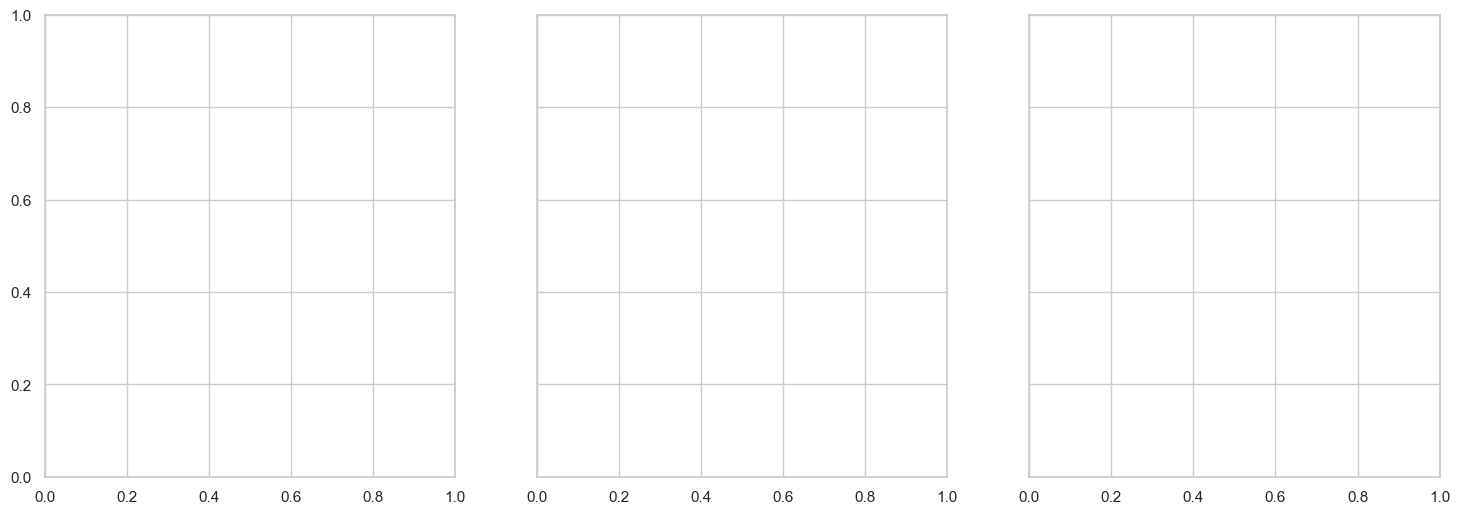

In [215]:
# Create subplots for side-by-side comparison of the clustering results
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# PC Clustering Plot
sns.scatterplot(data=pc_centroids_no_outlier, x='PAS_Modified', y='BR Wins', hue='Cluster', style='legend_category', palette='viridis', s=100, ax=axes[0])
axes[0].set_title('PC Clustering (PAS_Modified vs BR Wins)')
axes[0].set_xlabel('Playstyle Aggressiveness Score (PAS_Modified)')
axes[0].set_ylabel('BR Wins')

# PlayStation Clustering Plot
sns.scatterplot(data=ps_legend_stats, x='PAS_Modified', y='BR Wins', hue='Cluster', style='legend_category', palette='viridis', s=100, ax=axes[1])
axes[1].set_title('PlayStation Clustering (PAS_Modified vs BR Wins)')
axes[1].set_xlabel('Playstyle Aggressiveness Score (PAS_Modified)')
axes[1].set_ylabel('')

# Xbox Clustering Plot
sns.scatterplot(data=xbox_legend_stats, x='PAS_Modified', y='BR Wins', hue='Cluster', style='legend_category', palette='viridis', s=100, ax=axes[2])
axes[2].set_title('Xbox Clustering (PAS_Modified vs BR Wins)')
axes[2].set_xlabel('Playstyle Aggressiveness Score (PAS_Modified)')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()
